In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mit Drive verbinden -> kann auskommentiert werden
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Hardgecodeter Pfad zur CSV muss hier eingepflegt werden
# df = pd.read_csv("/content/drive/MyDrive/Final/results.csv")
df = pd.read_csv("results.csv") # wenn im selben ordner reicht das so

In [ ]:
df.head()

,Unnamed: 0,index,experiment,threshold,Orders_eingegangen,Orders_abgeschlossen,Warenträger_eingang,Ausbringungsmenge,Breakdowns,cycle_time,Order_Flow_Time,Order_Lead_Time,Predictives,tbf
0,0,0,break,-1.0,155,74,2861,2825.0,5.0,4.118811,9.144378,203.402276,0.0,44.993957
1,1,0,break,-1.0,155,71,2868,2808.0,5.0,4.325755,9.509280,186.804187,0.0,40.744442
2,2,0,break,-1.0,162,75,2839,2793.0,5.0,5.120218,8.995676,195.035365,0.0,47.850597
3,3,0,break,-1.0,161,72,2613,2578.0,4.0,6.454309,9.166427,190.447798,0.0,54.176460
4,4,0,break,-1.0,145,75,2804,2761.0,4.0,5.425656,8.966999,194.799696,0.0,50.770019


In [ ]:
df["b_Time"] = df["Breakdowns"]*120
df["p_Time"] = df["Predictives"]*48
df["Maintenance_Time"] = df["b_Time"] + df["p_Time"]

In [ ]:
df.groupby("experiment")[["Ausbringungsmenge","Breakdowns","Predictives","Maintenance_Time"]].mean()

,Ausbringungsmenge,Breakdowns,Predictives,Maintenance_Time
experiment,,,,
break,2731.901000,4.667000,0.000000,560.040000
pred_wo,4298.516000,0.089000,7.876000,388.728000
prescriptive,4339.194805,0.061938,7.975025,390.233766
time-based,4217.350000,0.049000,8.910000,433.560000


In [ ]:
df.groupby("experiment")[["Ausbringungsmenge","Breakdowns","Predictives","Maintenance_Time"]].std()

,Ausbringungsmenge,Breakdowns,Predictives,Maintenance_Time
experiment,,,,
break,135.300567,0.471522,0.000000,56.582683
pred_wo,202.562117,0.305241,0.541218,20.630648
prescriptive,213.659638,0.241164,0.512226,18.813115
time-based,158.939338,0.215976,0.405048,7.919414


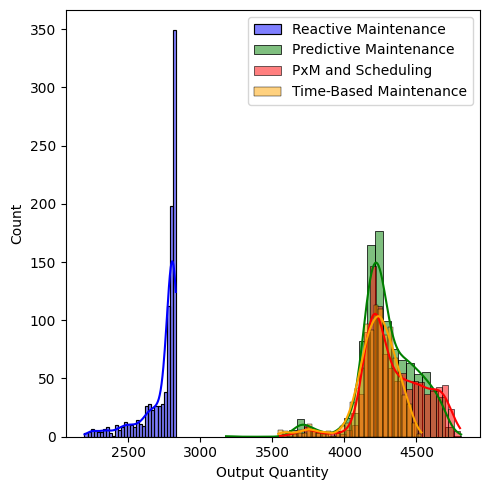

In [ ]:

# Strategienamen werden hier umbenannt
df['experiment'] = df['experiment'].replace({
    'time-based': 'Time-Based Maintenance',
    'break': 'Reactive Maintenance',
    'pred_wo': 'Predictive Maintenance',
    'prescriptive': 'PxM and Scheduling'
})

# Farben pro Strategie werden hier definiert
# die die weiter unten stehen sind weiter im vordergrund im Bild
experiment_colors = {
    'Reactive Maintenance': 'blue',
    'Predictive Maintenance': 'green',
    'PxM and Scheduling': 'red',
    'Time-Based Maintenance': 'orange'
}

# x achse beschriftung (muss in der Liste dadrunter auch geändert werden)
df.rename(columns={'Ausbringungsmenge': 'Output Quantity'}, inplace=True)

columns_for_visualization = ['Output Quantity']

# jedes Spalte in columns_for_visualization wird geplottet

for column in columns_for_visualization:
    # ###### Die größe der Schrift kann durch das ändern der Figure Size eingestellt werden ########
    plt.figure(figsize=(5, 5))

    for experiment, color in experiment_colors.items():
        subset = df[df['experiment'] == experiment]
        sns.histplot(subset[column], bins=30, kde=True, color=color, label=experiment)

    plt.legend()
    plt.ylabel("Count") # Count ist standard für die y achse und kann hier umbenannt werden
    plt.tight_layout()
    plt.show()